In [1]:
from SimPEG import PF
from fatiando import gravmag
import numpy as np
%pylab inline

Efficiency Warning: Interpolation will be slow, use setup.py!

            python setup.py build_ext --inplace
    
Populating the interactive namespace from numpy and matplotlib


C:\Users\dominiquef.MIRAGEOSCIENCE\Documents\GIT\fatiando\fatiando\vis\mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
# Define working directory
work_dir = './'

# Define data matrix
datFile = 'MB_TMI_cellsize15blank2000.dat'

# Limits
limFile = 'AreaofInterest_UTMWGS84z10.csv'

# Load the TMI data
data = np.loadtxt(work_dir + datFile)

# Load the limits
lim = np.loadtxt(work_dir + limFile, skiprows=1, delimiter=',')

In [41]:
# Subset the data matrix inside limits
xmin, xmax = lim[:,0].min(), lim[:,0].max()
ymin, ymax = lim[:,1].min(), lim[:,1].max()

indx = (data[:,0] > xmin) & (data[:,0] < xmax) & (data[:,1] > ymin) & (data[:,1] < ymax)

dsub = data[indx,:].copy()

# Get the number of grid points
xx, yy = np.unique(dsub[:,0]), np.unique(dsub[:,1])
nx, ny = xx.shape[0], yy.shape[0]


In [29]:
# Remove inducing field
dsub[:,3] -= 54318.

In [45]:
# Call Fatiando and calculate analytical signal
anaSignal = gravmag.transform.tga(dsub[:,0],dsub[:,1],dsub[:,3],(nx, ny), method='fft')

(596000.0, 599000.0, 5399500.0, 5403000.0)

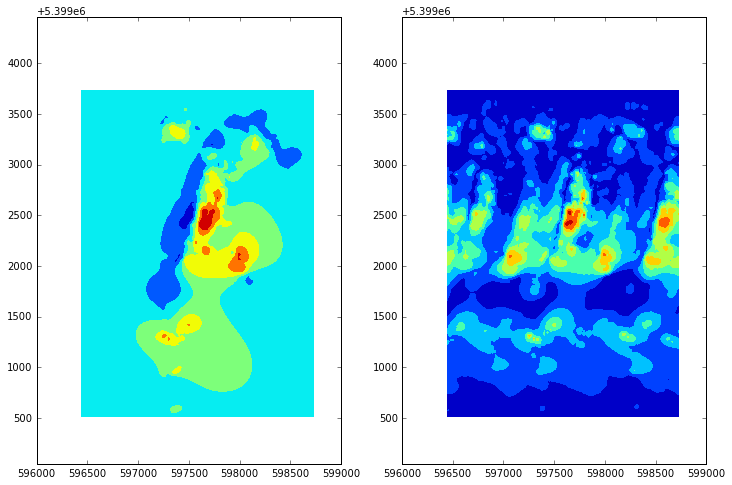

In [46]:
# Plot data
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.contourf(xx,yy,dsub[:,3].reshape((ny,nx)), c = 20)
plt.axis('equal')

plt.subplot(1,2,2)
plt.contourf(xx,yy,anaSignal[:].reshape((ny,nx)), c = 20)
plt.axis('equal')

In [44]:
np.savetxt('TMI.dat',dsub[:,(0,1,3)])
np.savetxt('AnaSignal.dat',np.c_[dsub[:,(0,1)],anaSignal])


In [26]:
xx.shape

(153L,)

In [39]:
data.shape

(218821L, 4L)